In [ ]:
library(DESeq2)
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [ ]:
# Combine the count data
countData <- cbind(scRNA_counts, bulkRNA_counts)


In [ ]:
# Load count data
scRNA_counts <- read.csv("mtec_iv.csv", row.names = 1)
bulkRNA_counts <- read.csv("bulk.csv", row.names = 1)

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("DESeq2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘formatR’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'cluster', 'lubridate', 'testthat'



In [ ]:
# Load colData
colData <- read.csv("Data.csv", row.names = 1)

In [ ]:
# Create DESeqDataSet
dds <- DESeqDataSetFromMatrix(countData = countData,
                              colData = colData,
                              design = ~ condition)


# Size factor estimation using the poscounts method
dds <- estimateSizeFactors(dds, type = "poscounts")



Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [ ]:
# Run the DESeq2 pipeline
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

-- replacing outliers and refitting for 2 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

  Note: levels of factors i

In [ ]:
# Extract results
res <- results(dds)

In [ ]:
# Order results by p-value
resOrdered <- res[order(res$pvalue),]

In [ ]:
print(resOrdered)

log2 fold change (MLE): condition mTEC.IV vs Bulk 
Wald test p-value: condition mTEC.IV vs Bulk 
DataFrame with 22 rows and 6 columns
           baseMean log2FoldChange     lfcSE       stat      pvalue        padj
          <numeric>      <numeric> <numeric>  <numeric>   <numeric>   <numeric>
Ccl21a     2.849985       12.51596   2.24420    5.57702 2.44679e-08 5.38295e-07
Aire       1.059630       -6.06325   2.45737   -2.46738 1.36107e-02 1.49717e-01
Hdc        1.039638       -4.72235   2.35818   -2.00254 4.52267e-02 3.31662e-01
Ubd        6.486573       -2.82368   1.57618   -1.79147 7.32175e-02 4.02696e-01
Serpinb6a  0.812908       -2.29954   1.93310   -1.18956 2.34219e-01 9.77879e-01
...             ...            ...       ...        ...         ...         ...
Apoe      1.7282423      -0.162018   1.62803 -0.0995173    0.920728    0.977879
Gnb3      0.2383525       0.340502   5.18076  0.0657244    0.947597    0.977879
Avil      0.6086012      -0.120863   3.91773 -0.0308502    0.97538

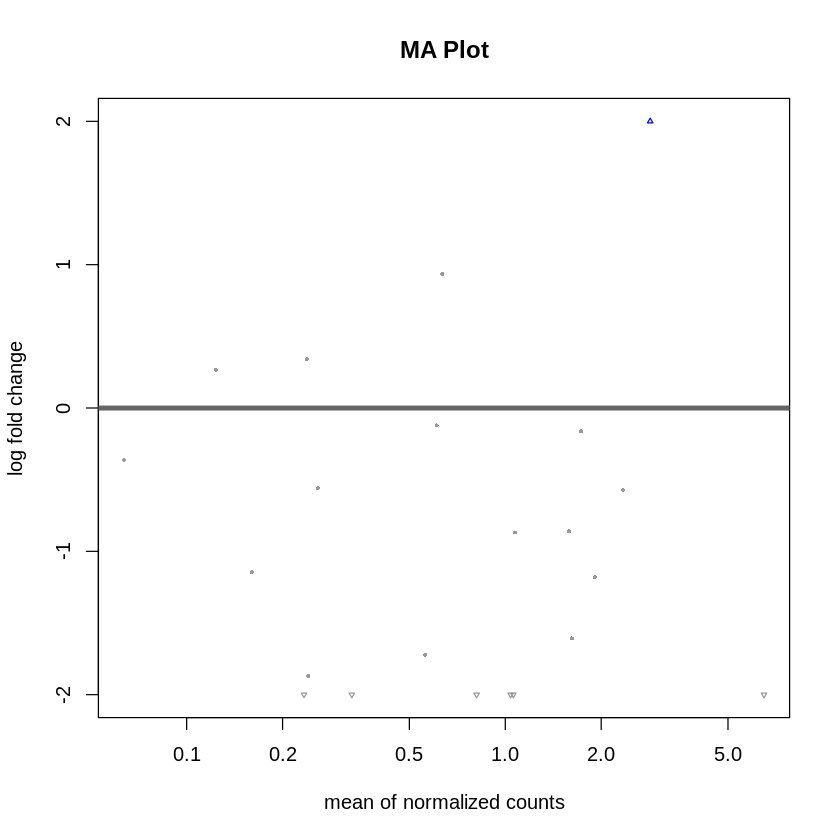

In [ ]:
# MA Plot
plotMA(res, ylim=c(-2,2), main="MA Plot")